<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#最长句子-段落" data-toc-modified-id="最长句子-段落-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>最长句子 段落</a></span></li><li><span><a href="#统计段落的分词长度" data-toc-modified-id="统计段落的分词长度-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>统计段落的分词长度</a></span></li><li><span><a href="#support-sentence数量分布" data-toc-modified-id="support-sentence数量分布-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>support sentence数量分布</a></span></li><li><span><a href="#最长support-sentence-tokens" data-toc-modified-id="最长support-sentence-tokens-0.4"><span class="toc-item-num">0.4&nbsp;&nbsp;</span>最长support sentence tokens</a></span></li></ul></li><li><span><a href="#统计nodes数量" data-toc-modified-id="统计nodes数量-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>统计nodes数量</a></span></li></ul></div>

In [1]:
import json
import torch
import torch.nn as nn
import numpy as np

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
json_train_path = r'./data/hotpot_train_v1.1.json'

with open(json_train_path, 'r', encoding='utf-8') as fp:
    json_train = json.load(fp)
    
json_train[0].keys()

dict_keys(['supporting_facts', 'level', 'question', 'context', 'answer', '_id', 'type'])

## 最长句子 段落

In [2]:
# 最长的一句话 bert分词长度:652
sentenses_index_len = np.array([np.array([index1,index2,index3,len(s)]) for index1,item in enumerate(json_train) \
                 for index2,c in enumerate(item['context']) \
                 for index3,s in enumerate(c[1])])
sentenses_len = [(s,len(s)) for index1,item in enumerate(json_train) \
                 for index2,c in enumerate(item['context']) \
                 for index3,s in enumerate(c[1])]

In [3]:
max_index = np.argmax(sentenses_index_len[:,3],axis=0)

In [4]:
sentenses_index_len[max_index]

array([17519,     1,     1,  2534])

In [5]:
sentenses_len[max_index]

(" The family first appeared in 2006 and the family have been involved in a number of the show's most high-profile storylines, most notably John Paul McQueen's (James Sutton) affair with Craig Dean (Guy Burnet); Jacqui McQueen's (Claire Cooper) whirlwind relationship with Tony Hutchinson (Nick Pickard); Myra McQueen's (Nicole Barber-Lane) long-lost son Niall Rafferty's (Barry Sloane) revenge on his family by holding them hostage in an abandoned church and blowing it up, ultimately killing his half-sister Tina Reilly (Leah Hackett); Theresa McQueen's (Jorgie Porter) pregnancy by her cousin Carmel McQueen's (Gemma Merna) fiancé Calvin Valentine (Ricky Whittle) and later shooting him dead on their wedding day; Mercedes McQueen's (Jennifer Metcalfe) affair with her fiancé Riley Costello's (Rob Norbuy) father Carl (Paul Opacic); being kidnapped by Riley's grandfather Silas; staking Riley's second cousin Mitzee Minniver; Jacqui coping with the death of her husband Rhys Ashworth (Andrew Moss)

In [6]:
# 最长的整个段落 bert分词长度:1633
paragraphs_index_len = np.array([np.array([index1,index2,len(''.join(c[1]))]) for index1,item in enumerate(json_train) \
                 for index2,c in enumerate(item['context'])])

In [7]:
paragraphs_len = [(''.join(c[1]),len(''.join(c[1]))) for index1,item in enumerate(json_train) \
                 for index2,c in enumerate(item['context'])]

In [8]:
max_index_p = np.argmax(paragraphs_index_len[:,2],axis=0)
max_index_p

8369

In [9]:
paragraphs_len[max_index_p]

('Loan modification is the systematic alteration of mortgage loan agreements that help those having problems making the payments by reducing interest rates, monthly payments or principal balances. Lending institutions could make one or more of these changes to relieve financial pressure on borrowers to prevent the condition of foreclosure. Loan modifications have been practiced in the United States since The 2008 Crash Of The Housing Market from Washington Mutual, Chase Home Finance, Chase, JP Morgan & Chase, other contributors like MER\'s. Crimes of Mortgage ad Real Estate Staff had long assisted nd finally the squeaky will could not continue as their deviant practices broke the state and crashed. Modification owners either ordered by The United States Department of Housing, The United States IRS or President Obamas letters from Note Holders came to those various departments asking for the Democratic process to help them keep their homes and protection them from explosion. Thus the bi

In [10]:
max_sen_in_train = """The family first appeared in 2006 and the family have been involved in a number of the show's most high-profile storylines, most notably John Paul McQueen's (James Sutton) affair with Craig Dean (Guy Burnet); Jacqui McQueen's (Claire Cooper) whirlwind relationship with Tony Hutchinson (Nick Pickard); Myra McQueen's (Nicole Barber-Lane) long-lost son Niall Rafferty's (Barry Sloane) revenge on his family by holding them hostage in an abandoned church and blowing it up, ultimately killing his half-sister Tina Reilly (Leah Hackett); Theresa McQueen's (Jorgie Porter) pregnancy by her cousin Carmel McQueen's (Gemma Merna) fiancé Calvin Valentine (Ricky Whittle) and later shooting him dead on their wedding day; Mercedes McQueen's (Jennifer Metcalfe) affair with her fiancé Riley Costello's (Rob Norbuy) father Carl (Paul Opacic); being kidnapped by Riley's grandfather Silas; staking Riley's second cousin Mitzee Minniver; Jacqui coping with the death of her husband Rhys Ashworth (Andrew Moss) in a bus crash, learning that he had been having an affair with Cindy Cunningham (Stephanie Waring) and that he got Sinead O'Connor (Stephanie Davis) pregnant; Mercedes stalking Mitzeee (Rachel Shenton) and stabbing herself and framing her; Carmel's facial disfigurement; Myra faking her own death to escape her daughter Mercedes' evil husband, Dr. Paul Browning (Joseph Thompson); Mercedes killing her husband Doctor Browning by striking him over the head with a shovel; John Paul's male rape at the hands of his pupil Finn O'Connor (Keith Rice); the train crash which ultimately killed Carmel; Mercedes faking her death to help Grace Black (Tamara Wall) get revenge on Freddie Roscoe (Charlie Clapham); Theresa donating her kidney to Nico Blake (Persephone Swales-Dawson); Porsche (Twinnie Lee Moore) and Cleo McQueen's (Nadine Rose Mulkerrin) sexual abuse at the hands of their mother Reenie McQueen's (Zöe Lucker) fiancé Pete Buchanan (Kai Owen); Phoebe McQueen's (Mandip Gill) murder in hospital by the Gloved Hand Killer; the stillbirth of Mercedes' baby Gabriel McQueen; John Paul's transgender boss Sally St. Claire (Annie Wallace) being revealed as his biological father, Mercedes being framed for drugs by Joanne Cardsley (Rachel Leskovac), Celine McQueen (Sarah George) and Diego Salvador Martinez Hernandez De La Cruz (Juan Pablo Yepez)'s sham wedding for money and Celine being murdered by her ex-boyfriend and serial killer Cameron Campbell (Cameron Moore) after discover he causes the fire at the fair on Halloween 2016."""
max_p = 'Loan modification is the systematic alteration of mortgage loan agreements that help those having problems making the payments by reducing interest rates, monthly payments or principal balances. Lending institutions could make one or more of these changes to relieve financial pressure on borrowers to prevent the condition of foreclosure. Loan modifications have been practiced in the United States since The 2008 Crash Of The Housing Market from Washington Mutual, Chase Home Finance, Chase, JP Morgan & Chase, other contributors like MER\'s. Crimes of Mortgage ad Real Estate Staff had long assisted nd finally the squeaky will could not continue as their deviant practices broke the state and crashed. Modification owners either ordered by The United States Department of Housing, The United States IRS or President Obamas letters from Note Holders came to those various departments asking for the Democratic process to help them keep their homes and protection them from explosion. Thus the birth of Modifications. It is yet to date for clarity how theses enforcements came into existence and except b whom, but t is certain that note holders form the Midwest reached out in the Democratic Process for assistance. FBI Mortgage Fraud Department came into existence. Modifications HMAP HARP were also birthed to help note holders get Justice through reduced mortgage by making terms legal. Modification of mortgage terms was introduced by IRS staff addressing the crisis called the HAMP TEAMS that went across the United States desiring the new products to assist homeowners that were victims of predatory lending practices, unethical staff, brokers, attorneys and lenders that contributed to the crash. Modification were a fix to the crash as litigation has ensued as the lenders reorganized and renamed the lending institutions and government agencies are to closely monitor them. Prior to modifications loan holders that experiences crisis would use Loan assumptions and Loan transfers to keep the note in the 1930s. During the Great Depression, loan transfers, loan assumption, and loan bail out programs took place at the state level in an effort to reduce levels of loan foreclosures while the Federal Bureau of Investigation, Federal Trade Commission, Comptroller, the United States Government and State Government responded to lending institution violations of law in these arenas by setting public court records that are legal precedence of such illegal actions. The legal precedents and reporting agencies were created to address the violations of laws to consumers while the Modifications were created to assist the consumers that are victims of predatory lending practices. During the so-called "Great Recession" of the early 21st century, loan modification became a matter of national policy, with various actions taken to alter mortgage loan terms to prevent further economic destabilization. Due to absorbent personal profits nothing has been done to educate Homeowners or Creditors that this money from equity, escrow is truly theirs the Loan Note Holder and it is their monetary rights as the real prize and reason for the Housing Crash was the profit n obtaining the mortgage holders Escrow. The Escrow and Equity that is accursed form the Note Holders payments various staff through the United States claimed as recorded and cashed by all staff in real-estate from local residential Tax Assessing Staff, Real Estate Staff, Ordinance Staff, Police Staff, Brokers, attorneys, lending institutional staff but typically Attorneys who are also typically the owners or Rental properties that are trained through Bankruptcies\'. that collect the Escrow that is rightfully the Homeowners but because most Homeowners are unaware of what money is due them and how they can loose their escrow. Most Creditors are unaware that as the note holder that the Note Holder are due a annual or semi annual equity check and again bank or other lending and or legal intuitions staff claim this monies instead. This money Note Holders were unaware of is the prize of real estate and the cause of the Real Estate Crash of 2008 where Lending Institutions provided mortgages to people years prior they know they would eventually loose with Loan holders purchasing Balloon Mortgages lending product that is designed to make fast money off the note holder whom is always typically unaware of their escrow, equity and that are further victimized by conferences and books on HOW TO MAKE MONEY IN REAL STATE - when in fact the money is the Note Holder. The key of the crash was not the House, but the loan product used and the interest and money that was accrued form the note holders that staff too immorally. The immoral and illegal actions of predatory lending station and their staff began with the inception of balloon mortgages although illegal activity has always existed in the arena, yet the crash created "Watch Dog" like HAMP TEAM, IRS, COMPTROLLER< Federal Trade Commission Consumer Protection Bureau, FBI, CIA, Local Police Department, ICE ( The FBI online Computer crime division receives and investigates computer crimes that record keeping staff from title companies, lending institutional staff, legal staff and others created fraudulent documents to change payments and billing of note holders to obtain the money note holders are typically unaware of) and other watch dog agencies came into existence to examine if houses were purchased through a processed check at Government Debited office as many obtained free homes illegally. Many were incarcerated for such illegal actions. Modifications fixed the Notes to proper lower interest, escrow, tax fees that staff typically raised for no reason. Many people from various arenas involved in reals estate have been incarcerated for these actions as well as other illegal actions like charging for a modification. Additionally Modifications were also made to address the falsifications such as inappropriate mortgage charges, filing of fraudulently deeds, reporting of and at times filing of fraudulent mortgages that were already paid off that were fraudulently continued by lenders staff and attorneys or brokers or anyone in the Real Estate Chain through the issues of real estate terms to continue to violate United States Laws, contract law and legal precedence where collusion was often done again to defraud and steal from the Note Holder was such a common practice that was evidence as to why the Mortgage Crash in 2008 occurred for the purpose of wining the prize of stealing form Homeowners and those that foreclosed was actually often purposefully for these monies note holders were unaware of to be obtained which was why Balloon mortgages and loans were given to the staff in the Real Estate Market with the hoper and the expectation that the loan holders would default as it offered opportunity to commit illegal transactions of obtaining the homeowners funds. While such scams were addressed through modifications in 2008. The Market relied heavily on Consumers ignorance to prosper, ignorance of real estate terms, ignorance on what they were to be charged properly for unethical financial gain and while staff in real estates lending arenas mingled terms to deceive y deliberate confusion consumers out of cash and homes while the USA Government provided Justice through President Obamas Inception and IRS Inception of Modifications which addressed these unethical profits in Reals Estate. It was in 2009 that HARP, HAMP and Modifications were introduced to stop the victimization of Note Holders. Taking on the Banks that ran USA Government was a great and dangerous undertaking that made America Great Again as Justice for Consumers reigned. Legal action taken against institutions that have such business practices can be viewed in State Code of Law and Federal Law on precedent cases that are available to the public. Finally, It had been unlawful to be charged by an attorney to modify as well as fro banking staff to modify terms to increase a mortgage and or change lending product to a balloon in an concerted effort to make homeowner foreclose which is also illegal, computer fraud and not the governments intended purpose or definition of a modification.'


## 统计段落的分词长度

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm.notebook import tqdm

In [11]:
paragraphs = [''.join(c[1]) for index1,item in enumerate(json_train) \
                 for index2,c in enumerate(item['context'])]

In [12]:
len(paragraphs)

899667

In [13]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('data/models/bert-base-cased')

In [16]:
paragraphs_lens = [len(tokenizer.tokenize(i)) for i in tqdm(paragraphs)]

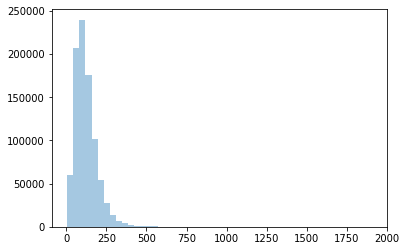

In [17]:
sns.distplot(paragraphs_lens, kde=False)

## support sentence数量分布

In [6]:
len_static = [len(i['supporting_facts']) for i in json_train]

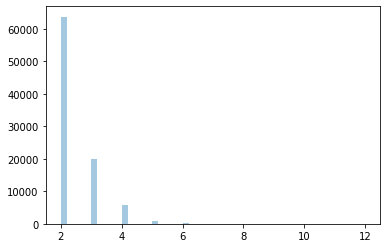

In [7]:
sns.distplot(len_static, kde=False)

In [8]:
for i in range(1, 13):
    print(i, len_static.count(i))

1 0
2 63676
3 20017
4 5814
5 724
6 141
7 52
8 17
9 4
10 0
11 1
12 1


## 最长support sentence tokens

In [9]:
all_support_sents = []

for item in json_train:
    support_sent = ''
    for support in item['supporting_facts']:
        for para in item['context']:
            if para[0] == support[0]:
                try:
                    support_sent += para[1][support[1]]
                except IndexError:
                    pass
    all_support_sents.append(support_sent)

In [10]:
len(all_support_sents)

90447

In [11]:
support_sents_len = [len(tokenizer_XLNET.encode(sent)) for sent in tqdm(all_support_sents)]

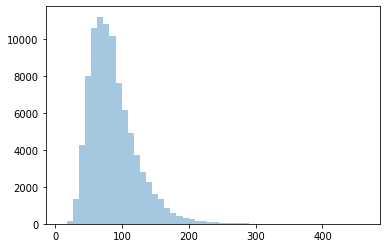

In [12]:
sns.distplot(support_sents_len, kde=False)

In [13]:
max(support_sents_len)

464

# 统计nodes数量

In [22]:
import ujson as json
import os
from tqdm.notebook import tqdm

In [23]:
def get_nodes_len(path):
    with open(path, 'r', encoding = 'utf-8') as fp:
        QA_item = json.load(fp)
    return len(QA_item['node_list'])

In [28]:
hotpotQA_item_folder = 'save_preprocess_new'
hotpotQA_item_path_list = os.listdir(hotpotQA_item_folder)
hotpotQA_item_path_list = [f'{hotpotQA_item_folder}/{item_path}' for item_path in hotpotQA_item_path_list]
len(hotpotQA_item_path_list)

60000

In [29]:
node_list_len = [get_nodes_len(path) for path in tqdm(hotpotQA_item_path_list)]

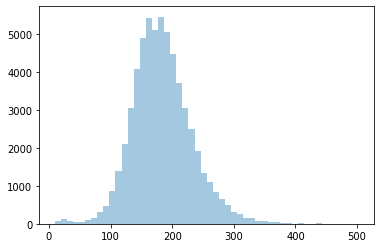

In [30]:
sns.distplot(node_list_len, kde=False)

In [34]:
node_list_len.count(340)

10